## Hypothesis Tests for One Population Mean when Sigma is Unknown


A hypothesis test for a population mean when the population standard deviation, σ, is unknown is conducted in the same way as if the population standard deviation is known. ***The only difference is that the t-distribution is invoked, instead of the standard normal distribution (z-distribution).***

For a test with null hypothesis H0:  μ=μ0, the test statistic, t, is calculated as

####  If population variance is unknown: $$ t = \frac{(\bar{x} - \mu)}{(s/\sqrt{n})}\ $$


Notations:

1. ***s*** is the sample's standard deviation provided the sample size is greater than 30

2. ***μ*** is the population mean = mean of all the samples from the CLT

3. ***x*** is the data of the random sample picked

4. ***n*** is the size of the sample

---

###### This hypothesis testing procedure is called one-mean t-test or simply t-test. The following are the steps to be followed:

Step 1:  State the null hypothesis H0 and alternative hypothesis H1

Step 2:  Decide on the significance level, α.

Step 3:  Compute the value of the test statistic.

Step 4a: Critical value approach: Determine the critical value.

Step 4b: P-value approach: Determine the p-value

Step 5a: Critical value approach: If the test statistic value falls in rejection region, rejectH0; otherwise, do not rejectH0

step 5b: P-value approach: If p≤α, reject H0; otherwise, do not reject H0

step 6:  Interpret the result of the hypothesis test.

---

###### Hypothesis testing: The critical value approach

***Let us build a function called simplettest().***

The function takes as input arguments:

1. a vector x (sample data)

2. mu0, which corresponds to μ0, the population average to test against

3. the specified significance level α, denominated as alpha

4. and the method of the t-test, left, right, or the default value two-sided( nothing but choosing one tailed or two tailed) with the function argument named method. 

***The output of the function determines whether to accept or reject the null hypothesis.***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import ttest_1samp
from scipy.stats import norm
from scipy.stats import t
import statistics as stats
import math
import random

---

**Question 1:**

Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~


H0 : (Null Hypothesis) 

on average each packet contains 500 grams of biryani.(=500)

---

H1 : (Alternate Hypothesis)

on average each packet does not contain 500 grams of biryani.(!=500)

In [2]:
def reqplot2q1(s,sample,mu0,sample_mean,t_critical_right,t_critical_left):
    x_min = 200
    x_max = 800
    
    # Defining the sampling distribution mean and sampling distribution std
    mean = mu0
    std = s/math.sqrt(len(sample))
    
    # Ploting the graph and setting the x limits
    x = np.linspace(x_min, x_max, 100)
    y = norm.pdf(x, mean, std)
    plt.xlim(x_min, x_max)
    plt.plot(x, y)
    
    # Shading the left rejection region
    x1 = np.linspace(x_min,mean+t_critical_right*std, 100)
    y1 = norm.pdf(x1, mean, std)
    plt.fill_between(x1, y1, color='yellow')

    # Shading the right rejection region
    x2 = np.linspace(mean+t_critical_left*std, x_max, 100)
    y2 = norm.pdf(x2, mean, std)
    plt.fill_between(x2, y2, color='yellow')


    # Ploting the sample mean and concluding the results 
    plt.scatter(sample_mean, 0)
    plt.annotate("x_bar", (sample_mean, 0.0007))

In [3]:
def samplettestq1(x, mu0, alpha, method='two-tailed'):
    
    n  = len(x)                       # sample length
    xbar = sum(x)/n;                  # sample mean
    s = stats.stdev(x)                # sample standard deviation
    
    # calculate test statistic (tscore)
    
    t_score = (xbar-mu0)/(s/math.sqrt(n))
    print("t score : ",t_score)       
    
    # calculating critical values and compare with its analysis with t_score
    
    if(method == 'two-tailed'):
        
        lower_cutoff = t.ppf(alpha/2, n - 1) 
        upper_cutoff = t.ppf(1-alpha/2, n - 1) 
        print("t-criticals: ",lower_cutoff,upper_cutoff)
        
        if(lower_cutoff<t_score<upper_cutoff):
            rejectnull = "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
        else:
            rejectnull = "Reject the Null Hypothesis"
        
        reqplot2q1(s,x,mu0,xbar,lower_cutoff,upper_cutoff)
            
    elif(method == 'right-tailed'):
        
        upper_cutoff = t.ppf(1-alpha,n-1)
        print("t-critical: ",upper_cutoff)
        
        if(t_score >= upper_cutoff):
            rejectnull = "Reject the Null Hypothesis"
        else:
            rejectnull = "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
        
        reqplotuq1(s,x,mu0,xbar,upper_cutoff)
        
    elif(method == 'left-tailed'):
        
        lower_cutoff = t.ppf(alpha,n-1)
        print("t-critical: ",lower_cutoff)
        
        if(t_score <= lower_cutoff):
            rejectnull = "Reject the Null Hypothesis"
        else:
            rejectnull =  "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
         
        reqplotlq1()
        
    # plotting the distribution:
    return rejectnull

t score :  -1.263475128444671
t-criticals:  -2.262157162740992 2.2621571627409915


'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'

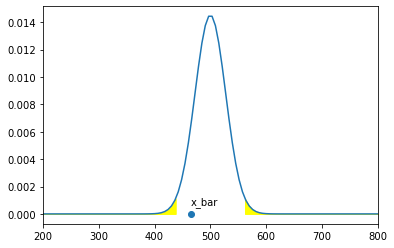

In [4]:
# consider the sample of these values 

l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]      # 'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'
# l = [100,110,120,140,180,220,156,250,340,403,440,550,560]     #  'Reject the Null Hypothesis'
samplettestq1(l,500,0.05)

###### This p-value approach works as verification proof for our critical t-value approach

In null hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis

$$
If p≤α, reject H0; \\If p>α, reject H0
$$
    

In [5]:
# p - value Approach     

l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]      # Failed to Reject Null Hypothesis i.e, accept Null Hypothesis
# l = [100,110,120,140,180,220,156,250,340,403,440,550,560]   # Reject the Null Hypothesis

from scipy.stats import ttest_1samp

tstats= ttest_1samp(l,500)                    # sample passed is l with assumed population mean 500

p_value  = tstats[1]

print("The P-value is : ",p_value)

if(p_value<0.05):
    print("Reject the Null Hypothesis")
else:
    print("Failed to Reject Null Hypothesis i.e, accept Null Hypothesis")

The P-value is :  0.23816470585327693
Failed to Reject Null Hypothesis i.e, accept Null Hypothesis


---

**Question 2:**

You have developed a new Natural Language Processing Algorithms and done a 
user study. You claim that the average rating given by the users is greater than 4 on a 
scale of 1 to 5. How do you prove this to your client? (Given that the population std is 0.5

H0 : (Null Hypothesis) 

the average rating given by the users on the NLP algorithm is equal or less than 4 on a scale of 1 to 5.(<=4)

---

H1 : (Alternate Hypothesis)

the average rating given by the users on the NLP algorithm is greater than 4 on a scale of 1 to 5.(>4)

In [6]:
def reqplotuq2(s,sample,mu0,sample_mean,t_critical_left):
    x_min = 3.6
    x_max = 4.4
    
    # Defining the sampling distribution mean and sampling distribution std
    mean = mu0
    std = s/math.sqrt(len(sample))
    
    # Ploting the graph and setting the x limits
    
    x = np.linspace(x_min, x_max, 100)
    y = norm.pdf(x, mean, std)
    plt.xlim(x_min, x_max)
    plt.plot(x, y)

    # Shading the right rejection region
    
    x2 = np.linspace(mean+t_critical_left*std, x_max, 100)
    y2 = norm.pdf(x2, mean, std)
    plt.fill_between(x2, y2, color='yellow')


    # Ploting the sample mean and concluding the results 
    
    plt.scatter(sample_mean, 0)
    plt.annotate("x_bar", (sample_mean, 0.0007))

In [7]:
def samplettestq2(x, mu0, alpha, method='two-tailed'):
    
    n  = len(x)                       # sample length
    xbar = sum(x)/n;                  # sample mean
    s = stats.stdev(x)                # sample standard deviation
    
    # calculate test statistic (tscore)
    
    t_score = (xbar-mu0)/(s/math.sqrt(n))
    print("t score : ",t_score)       
    
    # calculating critical values and compare with its analysis with t_score
    
    if(method == 'two-tailed'):
        
        lower_cutoff = t.ppf(alpha/2, n - 1) 
        upper_cutoff = t.ppf(1-alpha/2, n - 1) 
        print("t-criticals: ",lower_cutoff,upper_cutoff)
        
        if(lower_cutoff<t_score<upper_cutoff):
            rejectnull = "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
        else:
            rejectnull = "Reject the Null Hypothesis"
        
#         reqplot2q2(s,x,mu0,xbar,lower_cutoff,upper_cutoff)
            
    elif(method == 'right-tailed'):
        
        upper_cutoff = t.ppf(1-alpha,n-1)
        print("t-critical: ",upper_cutoff)
        
        if(t_score >= upper_cutoff):
            rejectnull = "Reject the Null Hypothesis"
        else:
            rejectnull = "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
        
        reqplotuq2(s,x,mu0,xbar,upper_cutoff)
        
    elif(method == 'left-tailed'):
        
        lower_cutoff = t.ppf(alpha,n-1)
        print("t-critical: ",lower_cutoff)
        
        if(t_score <= lower_cutoff):
            rejectnull = "Reject the Null Hypothesis"
        else:
            rejectnull =  "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
            
#        reqplotlq2(s,x,mu0,xbar,lower_cutoff)
        
    # plotting the distribution:
    return rejectnull

t score :  1.3142574813455419
t-critical:  1.729132811521367


'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'

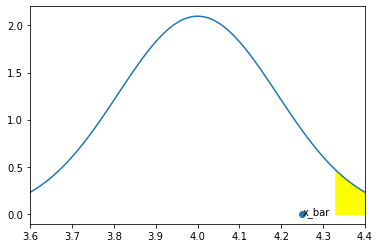

In [8]:
# consider the sample of these values 

l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]      # 'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'
# l = [4,4,4,4,4,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.2,4.2,4.2,4.3]   #  'Reject the Null Hypothesis'
samplettestq2(l,4,0.05,'right-tailed')

###### This p-value approach works as verification proof for our critical t-value approach

In null hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis

$$
If p≤α, reject H0; \\If p>α, reject H0
$$
    

In [9]:
# p - value Approach     

# l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]      # 'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'
l = [4,4,4,4,4,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.2,4.2,4.2,4.3]   #  'Reject the Null Hypothesis'

from scipy.stats import ttest_1samp

tstats= ttest_1samp(l,4)      # sample passed is l with assumed population mean 4

p_value  = tstats[1]

print("The P-value is : ",p_value)

if(p_value<0.025):                   # since one tail 
    print("Reject the Null Hypothesis")
else:
    print("Failed to Reject Null Hypothesis i.e, accept Null Hypothesis")

The P-value is :  9.875798788065359e-05
Reject the Null Hypothesis


---

**Question 3:**

Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~(Given that the population std is 1)~

H0 : (Null Hypothesis) 

the average of the SUV's mileage is at less than 15 km/litre (<15kmpl)

---

H1 : (Alternate Hypothesis)

the average of the SUV's mileage is at least 15 km/litre (>=15kmpl)

In [10]:
def reqplotlq3(s,sample,mu0,sample_mean,t_critical_right):
    x_min = 12
    x_max = 16
    
    # Defining the sampling distribution mean and sampling distribution std
    mean = mu0
    std = s/math.sqrt(len(sample))
    
    # Ploting the graph and setting the x limits
    
    x = np.linspace(x_min, x_max, 100)
    y = norm.pdf(x, mean, std)
    plt.xlim(x_min, x_max)
    plt.plot(x, y)

    # Shading the left rejection region
    x1 = np.linspace(x_min,mean+t_critical_right*std, 100)
    y1 = norm.pdf(x1, mean, std)
    plt.fill_between(x1, y1, color='yellow')

    # Ploting the sample mean and concluding the results 
    
    plt.scatter(sample_mean, 0)
    plt.annotate("x_bar", (sample_mean, 0.0007))

In [11]:
def samplettestq3(x, mu0, alpha, method='two-tailed'):
    
    n  = len(x)                       # sample length
    xbar = sum(x)/n;                  # sample mean
    s = stats.stdev(x)                # sample standard deviation
    
    # calculate test statistic (tscore)
    
    t_score = (xbar-mu0)/(s/math.sqrt(n))
    print("t score : ",t_score)       
    
    # calculating critical values and compare with its analysis with t_score
    
    if(method == 'two-tailed'):
        
        lower_cutoff = t.ppf(alpha/2, n - 1) 
        upper_cutoff = t.ppf(1-alpha/2, n - 1) 
        print("t-criticals: ",lower_cutoff,upper_cutoff)
        
        if(lower_cutoff<t_score<upper_cutoff):
            rejectnull = "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
        else:
            rejectnull = "Reject the Null Hypothesis"
        
#         reqplot2q3(s,x,mu0,xbar,lower_cutoff,upper_cutoff)
            
    elif(method == 'right-tailed'):
        
        upper_cutoff = t.ppf(1-alpha,n-1)
        print("t-critical: ",upper_cutoff)
        
        if(t_score >= upper_cutoff):
            rejectnull = "Reject the Null Hypothesis"
        else:
            rejectnull = "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
        
#         reqplotuq3(s,x,mu0,xbar,upper_cutoff)
        
    elif(method == 'left-tailed'):
        
        lower_cutoff = t.ppf(alpha,n-1)
        print("t-critical: ",lower_cutoff)
        
        if(t_score <= lower_cutoff):
            rejectnull = "Reject the Null Hypothesis"
        else:
            rejectnull =  "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
         
        reqplotlq3(s,x,mu0,xbar,lower_cutoff)
        
    # plotting the distribution:
    return rejectnull

t score :  0.4317882018907915
t-critical:  -1.7291328115213678


'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'

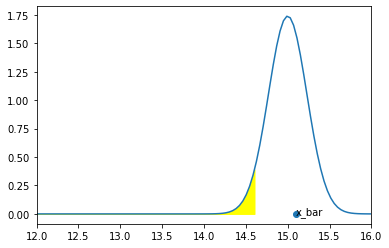

In [12]:
l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]

# The above sample gives 'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'

# l = [10.08,10.13,11.65,9.78,12.26,10.97,11.36,11.81,10.53,12.79,11.78,12.98,9.23,11.43,11.46,9.88,10.31,10.41,11.76,11.38]

# The above sample gives 'Reject the Null Hypothesis'

samplettestq3(l,15,0.05,'left-tailed')

###### This p-value approach works as verification proof for our critical t-value approach

In null hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis

$$
If p≤α, reject H0; \\If p>α, reject H0
$$
    

In [13]:
# p - value Approach     

l = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38] 

# The above sample gives 'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'

# l = [10.08,10.13,11.65,9.78,12.26,10.97,11.36,11.81,10.53,12.79,11.78,12.98,9.23,11.43,11.46,9.88,10.31,10.41,11.76,11.38]

# The above sample gives 'Reject the Null Hypothesis'


from scipy.stats import ttest_1samp

tstats= ttest_1samp(l,15)      # sample passed is l with assumed population mean 4

p_value  = tstats[1]

print("The P-value is : ",p_value)

if(p_value<0.025):                   # since one tail 
    print("Reject the Null Hypothesis")
else:
    print("Failed to Reject Null Hypothesis i.e, accept Null Hypothesis")

The P-value is :  0.6707555050252283
Failed to Reject Null Hypothesis i.e, accept Null Hypothesis


---

**Question 4:**

You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~

H0 : (Null Hypothesis) 

the average time to predict a future datapoint by the ML application is greater than or equal to 100ms. (>=100)

---

H1 : (Alternate Hypothesis)

the average time to predict a future datapoint by the ML application is less than 100ms. (<100)

In [14]:
def reqplotlq4(s,sample,mu0,sample_mean,t_critical_right):
    x_min = 70
    x_max = 100
    
    # Defining the sampling distribution mean and sampling distribution std
    mean = mu0
    std = s/math.sqrt(len(sample))
    
    # Ploting the graph and setting the x limits
    
    x = np.linspace(x_min, x_max, 100)
    y = norm.pdf(x, mean, std)
    plt.xlim(x_min, x_max)
    plt.plot(x, y)

    # Shading the left rejection region
    x1 = np.linspace(x_min,mean+t_critical_right*std, 100)
    y1 = norm.pdf(x1, mean, std)
    plt.fill_between(x1, y1, color='yellow')

    # Ploting the sample mean and concluding the results 
    
    plt.scatter(sample_mean, 0)
    plt.annotate("x_bar", (sample_mean, 0.0007))

In [15]:
def samplettestq4(x, mu0, alpha, method='two-tailed'):
    
    n  = len(x)                       # sample length
    xbar = sum(x)/n;                  # sample mean
    s = stats.stdev(x)                # sample standard deviation
    
    # calculate test statistic (tscore)
    
    t_score = (xbar-mu0)/(s/math.sqrt(n))
    print("t score : ",t_score)       
    
    # calculating critical values and compare with its analysis with t_score
    
    if(method == 'two-tailed'):
        
        lower_cutoff = t.ppf(alpha/2, n - 1) 
        upper_cutoff = t.ppf(1-alpha/2, n - 1) 
        print("t-criticals: ",lower_cutoff,upper_cutoff)
        
        if(lower_cutoff<t_score<upper_cutoff):
            rejectnull = "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
        else:
            rejectnull = "Reject the Null Hypothesis"
        
#         reqplot2q4(s,x,mu0,xbar,lower_cutoff,upper_cutoff)
            
    elif(method == 'right-tailed'):
        
        upper_cutoff = t.ppf(1-alpha,n-1)
        print("t-critical: ",upper_cutoff)
        
        if(t_score >= upper_cutoff):
            rejectnull = "Reject the Null Hypothesis"
        else:
            rejectnull = "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
        
#         reqplotuq4(s,x,mu0,xbar,upper_cutoff)
        
    elif(method == 'left-tailed'):
        
        lower_cutoff = t.ppf(alpha,n-1)
        print("t-critical: ",lower_cutoff)
        
        if(t_score <= lower_cutoff):
            rejectnull = "Reject the Null Hypothesis"
        else:
            rejectnull =  "Failed to Reject Null Hypothesis i.e, accept Null Hypothesis"
            
        reqplotlq4(s,x,mu0,xbar,lower_cutoff)
        
    # plotting the distribution:
    return rejectnull

t score :  -1.2555721135239395
t-critical:  -1.6603911559963902


'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'

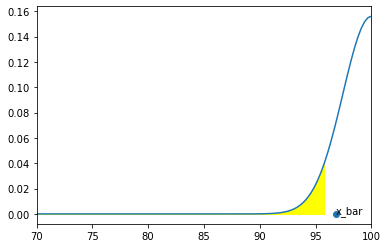

In [16]:
# consider the sample of these values 
random.seed(0)
l1 = []
for j in range(100):
    l1.append(random.randint(50,140 ))
    
sample_mean = sum(l1)/len(l1)                     # 96.29 ms (sample mean)  100 ms is the assumed population mean

samplettestq4(l1,100,0.05,'left-tailed')         # 'Failed to Reject Null Hypothesis i.e, accept Null Hypothesis'

t score :  -9.686202983504966
t-critical:  -1.6603911559963902


'Reject the Null Hypothesis'

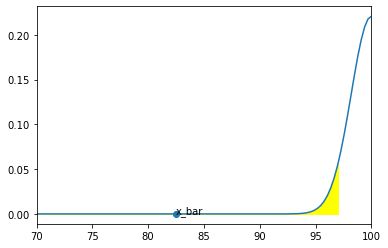

In [17]:
random.seed(0)
l2 = []
for j in range(100):
    l2.append(random.randint(50,110 ))
    
sample_mean = sum(l2)/len(l2)                          # 82.5 ms (sample mean)  100 ms is the assumed population mean

samplettestq4(l2,100,0.05,'left-tailed') 

###### This p-value approach works as verification proof for our critical t-value approach

In null hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis

$$
If p≤α, reject H0; \\If p>α, reject H0
$$
    

In [18]:
# p - value Approach     


from scipy.stats import ttest_1samp

# tstats= ttest_1samp(l1,100)      # sample passed is l1  # Failed to Reject Null Hypothesis i.e, accept Null Hypothesis

tstats= ttest_1samp(l2,100)      # sample passed is l2      # Reject the Null Hypothesis

p_value  = tstats[1]

print("The P-value is : ",p_value)

if(p_value<0.025):                   # since one tail 
    print("Reject the Null Hypothesis")
else:
    print("Failed to Reject Null Hypothesis i.e, accept Null Hypothesis")

The P-value is :  5.292448490510035e-16
Reject the Null Hypothesis


***CONCLUSION:***

1. The ‘One sample T Test’ is one of the 3 types of T Tests. It is used when you want to test if the mean of the population from which the sample is drawn is of a hypothesized value. 

2. It is very useful When the population variance of that feature is unknown.

3. Every Question is cross verified by critical t-value approach and the p-value approach